In [2]:
%pylab inline
import torch as th
import torch.optim as optim
import torch.nn as nn
import numpy as np

def plot_loss_curve(loss_curve):
    plt.plot(list(range(len(loss_curve))), loss_curve)

Populating the interactive namespace from numpy and matplotlib


In [3]:
def loss_function(dataset, k, lam_prime, eps=0.001):
    a = th.log(k + eps) + k * th.log(dataset)
    b = - k * th.log(lam_prime + eps) - th.log(dataset)
    c = - (dataset/lam_prime)**k
    return -(th.mean(a + b + c))
    #p1 = dataset * th.log(1 - p)
    #p2 = th.log(p + eps) # eps added to prevent underflow
    #acc = th.mean(p1 + p2)
    #return -acc


# Recall that p must be a probability, so instead of learning p directly, we instead learn a paramater that when
# passed through sigmoid gives us p


class Model(nn.Module):
    def __init__(self):
        super().__init__()
        lam_prime = np.random.normal(2)
        k_prime = np.random.normal(2)
        self.k_prime = nn.Parameter(th.tensor(k_prime))
        self.lam_prime = nn.Parameter(th.tensor(lam_prime))
        
    
    def k(self):
        return th.abs(self.k_prime) 
    
    def lam(self):
        return th.abs(self.lam_prime)
    
    def loss(self, dataset):
        return loss_function(dataset, self.k(), self.lam())

In [10]:
model = Model()
lr = 0.01
optimiser = optim.SGD(model.parameters(), lr=lr)
num_iters = 10000
loss_curve = []

In [11]:
#fp = open('mle1.npy', 'rb')
fp = open('../../data.npy', 'rb')
dataset = np.load(fp)
fp.close()
dataset = th.tensor(dataset, dtype=th.float32)

In [12]:
for i in range(num_iters):
    optimiser.zero_grad()
    loss_value = model.loss(dataset)
    loss_curve.append(loss_value.data.item())
    loss_value.backward()
    optimiser.step()

In [13]:
k = model.k().detach().numpy()
lam = model.lam().detach().numpy()

In [14]:
print(k)
print(lam)

0.95788956
1.2074935


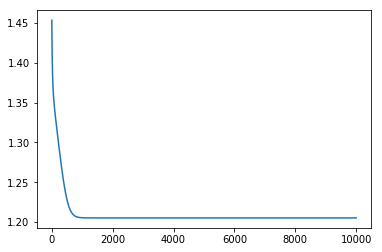

In [15]:
plot_loss_curve(loss_curve)

AttributeError: 'Model' object has no attribute 'p'

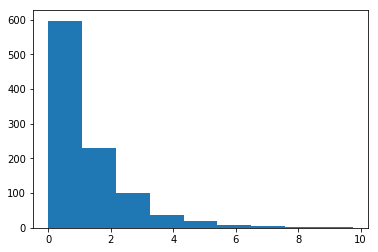

In [55]:
histogram = plt.hist(dataset.numpy(), bins=int(np.max(dataset.numpy())))
arr = []
for i in range(41):
    prob = (1 - model.k()) ** i * model.p()
    arr.append(prob * len(dataset))
plt.plot(list(range(41)), arr)